Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [50]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import nbimporter
import pandas as pd
from renamevars import renamevars
from scat_plt import scat_plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from normalize import normalize
from group_and_average import group_and_average


## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [15]:
# We will start by loading the parkinson dataset. The rest is up to you!
# df = pd.read_csv('parkinsons.data', 
  #               dtype = { # indicate categorical variables
   #                  'status': 'category'})
# df.head(5)

file_path = 'data/parkinsons.data'
df = pd.read_csv(file_path, 
                 dtype={  # indicate categorical variables
                     'status': 'category'
                 })
df.dropna(inplace = True)

df['status'] = df['status'].astype('int')

df.head(10)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### 1. Cleaning and tidying the dataset

In [16]:
# check variable names, data type and number of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

We observe that some variable names contain special characters like **':'**, **'%'** or **'('**. So we decide to rename them in order to avoid misunderstanding while writing our code. In order to complete the task, we call the function **'renamevars'**.

In [17]:
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}

df = renamevars(df, dict_names)
df.head()


,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


The **name** column consists of encoded information for each sample in the dataset. This encoding comprises a common first part across all rows, namely the **phon_R01** segment. Subsequently, there is a section where the subject_id is specified, and the final character indicates a particular phonation trial. For instance, in the first row, we encounter **S01_1**, where S01 represents subject one and corresponds to the initial phonation trial. 

To facilitate the identification of each subject and the trials conducted for each one, we will split the **name** column into two separate columns, namely _subject_id_  and _trial_. Subsequently, we will remove the original **name** column. 
Before to do this, we check if the column _name_ is the **unique identifier** of the df.
If so, we replace the existing index with a **multi-index** that will include the columns _subject_id_ and _trial_. We do this because the dataset contains multiple records for a single subject, so we could not use only _subject_id_ as an index.

In [18]:
df['name'].is_unique

True

In [19]:
# Split the 'name' column in the DataFrame 'df' using '_' as a separator, creating a new DataFrame 'aux'.
aux = df.name.str.split('_', expand=True)

# Display the resulting DataFrame after splitting the 'name' column.
print('After splitting the values in the "name" column, the following DataFrame is obtained. The first two columns are not relevant:')
print(aux.head())

# Drop the first two columns from the 'aux' DataFrame as they are not relevant for analysis.
aux.drop(aux.columns[[0, 1]], axis=1, inplace=True)

# Rename the remaining columns in 'aux' for better interpretation.
aux.columns = ['subject_id', 'trial']

# Add the 'subject_id' and 'trial' columns from 'aux' to the original DataFrame 'df'.
df['subject_id'] = aux['subject_id']
df['trial'] = aux['trial']

# We set multi-index
df = df.set_index(['subject_id', 'trial'])

# Drop the original 'name' column from the DataFrame 'df'.
df.drop(['name'], axis=1, inplace=True)

# Display the first 5 rows of the modified DataFrame 'df'.
df.head(5)

After splitting the values in the "name" column, the following DataFrame is obtained. The first two columns are not relevant:
      0    1    2  3
0  phon  R01  S01  1
1  phon  R01  S01  2
2  phon  R01  S01  3
3  phon  R01  S01  4
4  phon  R01  S01  5


avFF    maxFF    minFF  percJitter  absJitter      rap  \
subject_id trial                                                              
S01        1      119.992  157.302   74.997     0.00784    0.00007  0.00370   
           2      122.400  148.650  113.819     0.00968    0.00008  0.00465   
           3      116.682  131.111  111.555     0.01050    0.00009  0.00544   
           4      116.676  137.871  111.366     0.00997    0.00009  0.00502   
           5      116.014  141.781  110.655     0.01284    0.00011  0.00655   

                      ppq      ddp  lShimer  dbShimer  ...      dda      NHR  \
subject_id trial                                       ...                     
S01        1      0.00554  0.01109  0.04374     0.426  ...  0.06545  0.02211   
           2      0.00696  0.01394  0.06134     0.626  ...  0.09403  0.01929   
           3      0.00781  0.01633  0.05233     0.482  ...  0.08270  0.01309   
           4      0.00698  0.01505  0.05492     0.517  ...  0.08771  0.01353   
           5      0.00908  0.01966  0.06425     0.584  ...  0.10470  0.01767   

                     HNR  status      RPDE       DFA   spread1   spread2  \
subject_id trial                                                           
S01        1      21.033       1  0.414783  0.815285 -4.813031  0.266482   
           2      19.085       1  0.458359  0.819521 -4.075192  0.335590   
           3      20.651       1  0.429895  0.825288 -4.443179  0.311173   
           4      20.644       1  0.434969  0.819235 -4.117501  0.334147   
           5      19.649       1  0.417356  0.823484 -3.747787  0.234513   

                        D2       PPE  
subject_id trial                      
S01        1      2.301442  0.284654  
           2      2.486855  0.368674  
           3      2.342259  0.332634  
           4      2.405554  0.368975  
           5      2.332180  0.410335  

[5 rows x 23 columns]

### 2. Basic EDA based on plots and descriptive statistics

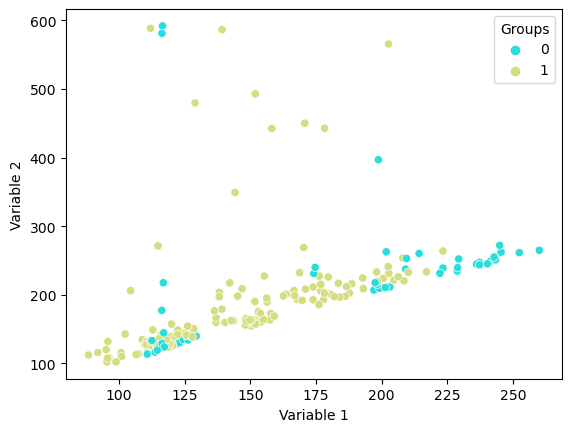

In [20]:
var1 = df['avFF']
var2 = df['maxFF']
groups= df['status']

# Call the function to create a scatter plot for fundamental frequency
scat_plt(var1, var2, groups)

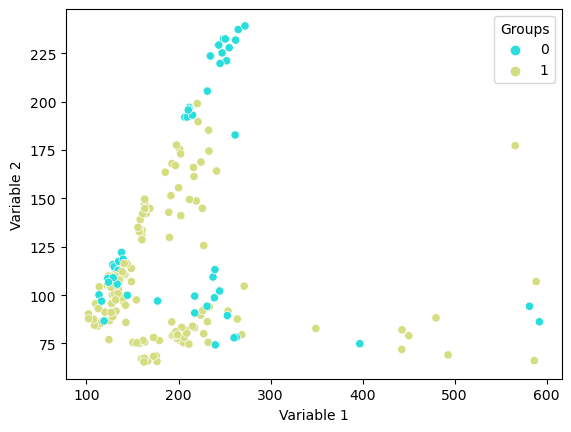

In [21]:
var1 = df['maxFF']
var2 = df['minFF']
groups= df['status']

# Call the function to create a scatter plot for fundamental frequency
scat_plt(var1, var2, groups)

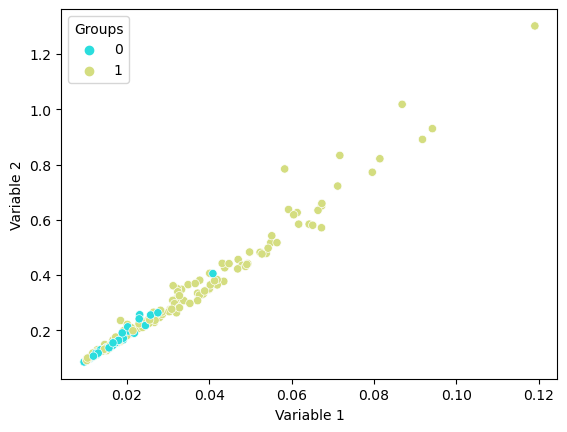

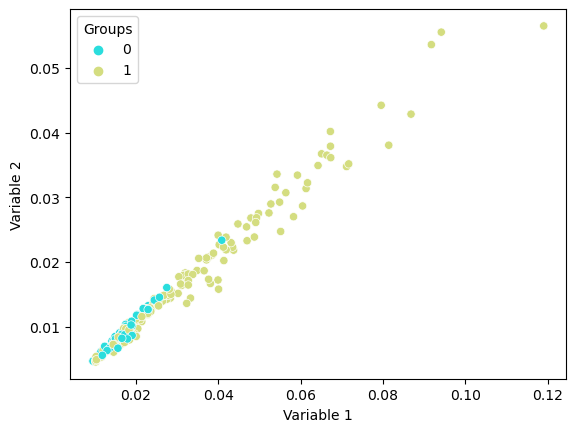

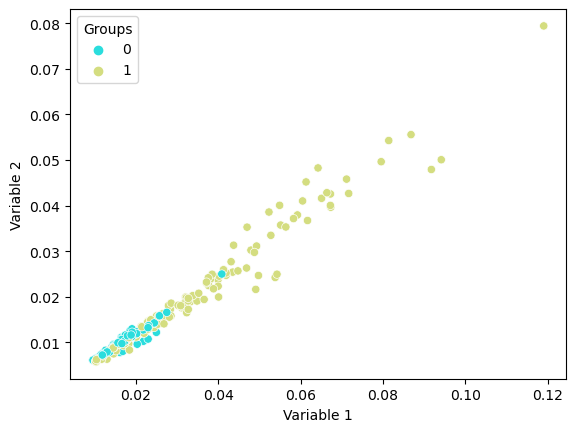

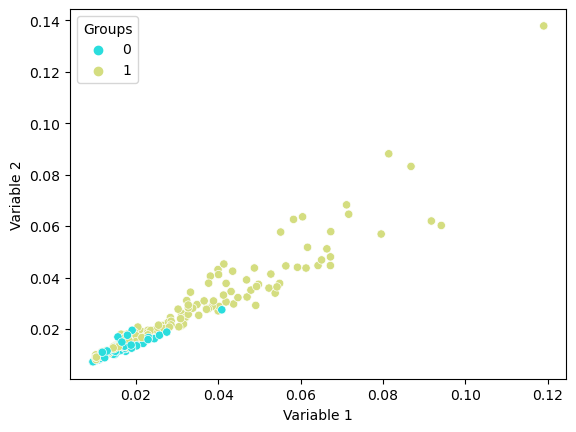

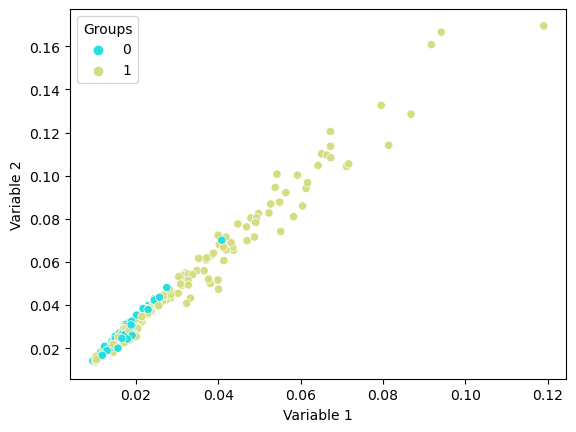

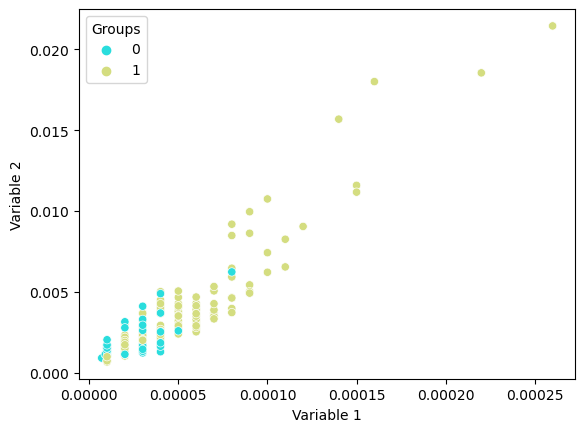

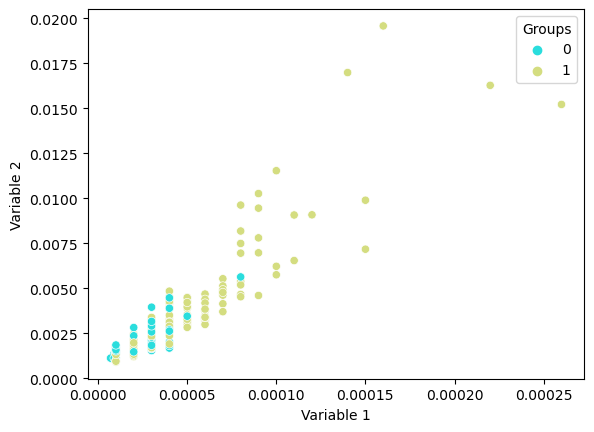

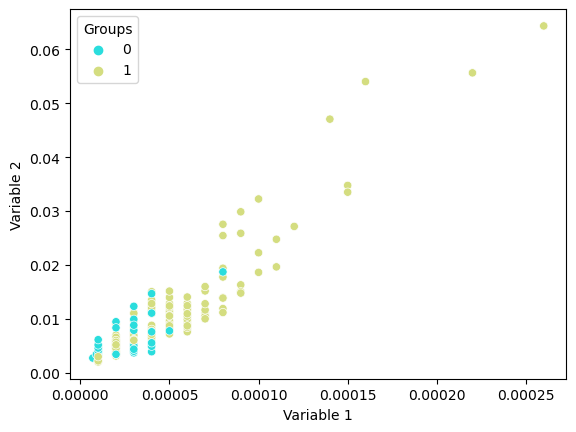

In [22]:
# Calculate the correlation coefficients
correlation_1 = df["avFF"].corr(df["maxFF"])
correlation_2 = df["maxFF"].corr(df["minFF"])

# Scatter plots for Shimmer variables
scat_plt(df['lShimer'], df['dbShimer'], df['status'])
scat_plt(df['lShimer'], df['apq3'], df['status'])
scat_plt(df['lShimer'], df['apq5'], df['status'])
scat_plt(df['lShimer'], df['apq'], df['status'])
scat_plt(df['lShimer'], df['dda'], df['status'])

# Scatter plots for Jitter variables
scat_plt(df['absJitter'], df['rap'], df['status'])
scat_plt(df['absJitter'], df['ppq'], df['status'])
scat_plt(df['absJitter'], df['ddp'], df['status'])

# Correlation matrix for Shimmer variables
shimmer_corr = df[['lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']].corr()
# Correlation matrix for fundamental frequency variables
fundamental_freq_corr = df[['avFF', 'maxFF', 'minFF']].corr()
jitter_corr = df[['absJitter', 'rap', 'ppq', 'ddp']].corr()



In [23]:
fundamental_freq_corr

,avFF,maxFF,minFF
avFF,1.000000,0.400985,0.596546
maxFF,0.400985,1.000000,0.084951
minFF,0.596546,0.084951,1.000000


In [24]:
jitter_corr

,absJitter,rap,ppq,ddp
absJitter,1.000000,0.922911,0.897778,0.922913
rap,0.922911,1.000000,0.957317,1.000000
ppq,0.897778,0.957317,1.000000,0.957319
ddp,0.922913,1.000000,0.957319,1.000000


In [25]:
shimmer_corr

,lShimer,dbShimer,apq3,apq5,apq,dda
lShimer,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626
dbShimer,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202
apq3,0.987625,0.963198,1.000000,0.960070,0.896645,1.000000
apq5,0.982835,0.973751,0.960070,1.000000,0.949146,0.960072
apq,0.950083,0.960977,0.896645,0.949146,1.000000,0.896647
dda,0.987626,0.963202,1.000000,0.960072,0.896647,1.000000


In [30]:
cleaned_df = df[['avFF', 'absJitter', 'lShimer']].copy()

# Set the correlation threshold
correlation_threshold = 0.9

# Calculate the correlation matrix
corr_matrix = cleaned_df.corr()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than the threshold
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Drop the highly correlated features from the DataFrame
cleaned_df.drop(high_corr_columns, axis=1, inplace=True)

cleaned_df


avFF  absJitter  lShimer
subject_id trial                             
S01        1      119.992    0.00007  0.04374
           2      122.400    0.00008  0.06134
           3      116.682    0.00009  0.05233
           4      116.676    0.00009  0.05492
           5      116.014    0.00011  0.06425
...                   ...        ...      ...
S50        2      174.188    0.00003  0.04087
           3      209.516    0.00003  0.02751
           4      174.688    0.00008  0.02308
           5      198.764    0.00004  0.02296
           6      214.289    0.00003  0.01884

[195 rows x 3 columns]

In [31]:

# Add the desired columns to the cleaned_df DataFrame
cleaned_df[['NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE','status']] = df[['NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE','status']]

cleaned_df


avFF  absJitter  lShimer      NHR     HNR      RPDE  \
subject_id trial                                                           
S01        1      119.992    0.00007  0.04374  0.02211  21.033  0.414783   
           2      122.400    0.00008  0.06134  0.01929  19.085  0.458359   
           3      116.682    0.00009  0.05233  0.01309  20.651  0.429895   
           4      116.676    0.00009  0.05492  0.01353  20.644  0.434969   
           5      116.014    0.00011  0.06425  0.01767  19.649  0.417356   
...                   ...        ...      ...      ...     ...       ...   
S50        2      174.188    0.00003  0.04087  0.02764  19.517  0.448439   
           3      209.516    0.00003  0.02751  0.01810  19.147  0.431674   
           4      174.688    0.00008  0.02308  0.10715  17.883  0.407567   
           5      198.764    0.00004  0.02296  0.07223  19.020  0.451221   
           6      214.289    0.00003  0.01884  0.04398  21.209  0.462803   

                       DFA   spread1   spread2        D2       PPE  status  
subject_id trial                                                            
S01        1      0.815285 -4.813031  0.266482  2.301442  0.284654       1  
           2      0.819521 -4.075192  0.335590  2.486855  0.368674       1  
           3      0.825288 -4.443179  0.311173  2.342259  0.332634       1  
           4      0.819235 -4.117501  0.334147  2.405554  0.368975       1  
           5      0.823484 -3.747787  0.234513  2.332180  0.410335       1  
...                    ...       ...       ...       ...       ...     ...  
S50        2      0.657899 -6.538586  0.121952  2.657476  0.133050       0  
           3      0.683244 -6.195325  0.129303  2.784312  0.168895       0  
           4      0.655683 -6.787197  0.158453  2.679772  0.131728       0  
           5      0.643956 -6.744577  0.207454  2.138608  0.123306       0  
           6      0.664357 -5.724056  0.190667  2.555477  0.148569       0  

[195 rows x 12 columns]

After cleaning the dataset and removing some variables as a result of the correlation analysis, we can go on to calculate some statistics on the data.

We calculate the number of observations and the number of variables.

In [37]:
num_observations = cleaned_df.shape[0]  
num_observations

195

In [39]:
num_variables = cleaned_df.shape[1]
num_variables

12

To check whether there are differences between controls and patients, we choose significant variables such as **<em>avFF</em>** e **<em>absJitter</em>** and calculate the statistics.

In [46]:
control_patients_stats = cleaned_df.groupby('status')[['avFF', 'absJitter']].describe()
control_patients_stats

avFF                                                              \
        count        mean        std      min       25%      50%      75%   
status                                                                      
0        48.0  181.937771  52.731067  110.739  120.9475  198.996  229.077   
1       147.0  145.180762  32.348050   88.333  117.5720  145.174  170.071   

                absJitter                                                   \
            max     count      mean       std       min      25%       50%   
status                                                                       
0       260.105      48.0  0.000023  0.000015  0.000007  0.00001  0.000025   
1       223.361     147.0  0.000051  0.000037  0.000010  0.00003  0.000040   

                          
            75%      max  
status                    
0       0.00003  0.00008  
1       0.00006  0.00026

From the results obtained, there appear to be clear differences between controls (status 0) and patients (status 1) for both variables.

For the variable avFF mean and standard deviation values are higher in controls than in patients. In contrast, for the variable absJitter, the mean and standard deviation values tend to be higher for patients than for controls.

In conclusion, there appears to be a clear difference between controls and patients for both variables. However, the variability is not comparable between the two groups, with controls showing greater variability for MDVP:Fo(Hz) and patients showing greater variability for MDVP:Jitter(Abs).

<h4>Check outliers</h4>

Outliers in column 'avFF':
[]


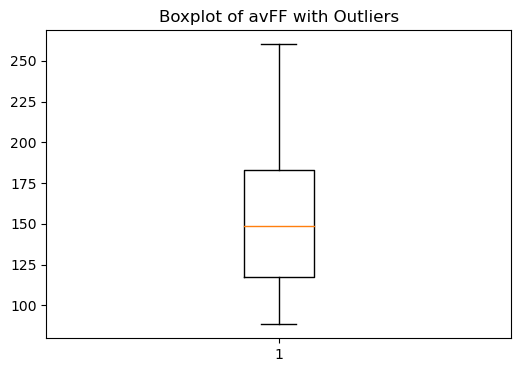

Outliers in column 'absJitter':
[0.00015, 0.00026, 0.00012, 0.00022, 0.00016, 0.00014, 0.00015]


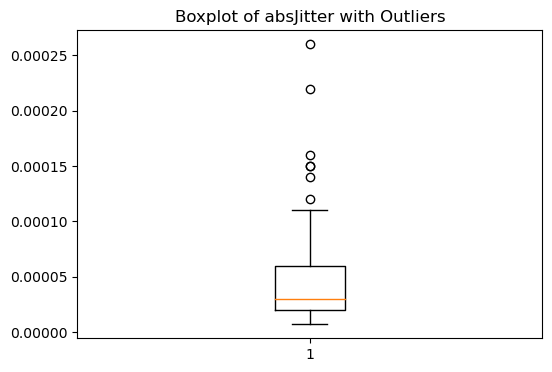

Outliers in column 'lShimer':
[0.07959, 0.09178, 0.09419, 0.08143, 0.07118, 0.0717, 0.11908, 0.08684]


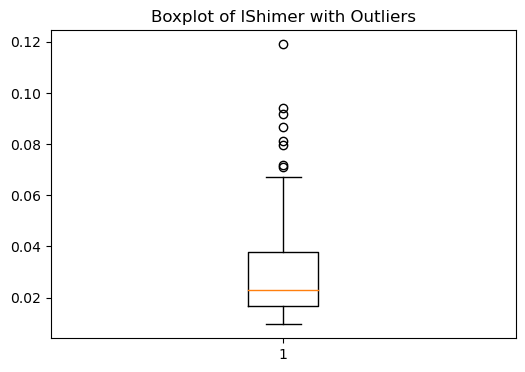

In [47]:
columns = ['avFF', 'absJitter', 'lShimer']

for column in columns:
    # Create a boxplot for the specified column and get the outliers
    plt.figure(figsize=(6, 4))
    boxplot_result = plt.boxplot(cleaned_df[column], showfliers=True)

    # Extract outlier values for the specified column
    outlier_values = [outlier.get_ydata() for outlier in boxplot_result['fliers']]
    outlier_values = [item for sublist in outlier_values for item in sublist]

    print(f"Outliers in column '{column}':")
    print(outlier_values)

    plt.title(f"Boxplot of {column} with Outliers")
    plt.show()

From the boxplot we can observe that the <em>avFF</em> variable does not contain outliers, whereas the other two variables shown contain outliers.

Outliers could be replaced by the average.

In [48]:
df_no_outliers = cleaned_df.copy()

columns = ['absJitter', 'lShimer']

for column in columns:
    mean_value = df_no_outliers[column].mean()

    df_no_outliers.loc[df_no_outliers[column].isin(outlier_values), column] = mean_value

print("New DataFrame after handling outliers:")
print(df_no_outliers)

New DataFrame after handling outliers:
                     avFF  absJitter  lShimer      NHR     HNR      RPDE  \
subject_id trial                                                           
S01        1      119.992    0.00007  0.04374  0.02211  21.033  0.414783   
           2      122.400    0.00008  0.06134  0.01929  19.085  0.458359   
           3      116.682    0.00009  0.05233  0.01309  20.651  0.429895   
           4      116.676    0.00009  0.05492  0.01353  20.644  0.434969   
           5      116.014    0.00011  0.06425  0.01767  19.649  0.417356   
...                   ...        ...      ...      ...     ...       ...   
S50        2      174.188    0.00003  0.04087  0.02764  19.517  0.448439   
           3      209.516    0.00003  0.02751  0.01810  19.147  0.431674   
           4      174.688    0.00008  0.02308  0.10715  17.883  0.407567   
           5      198.764    0.00004  0.02296  0.07223  19.020  0.451221   
           6      214.289    0.00003  0.01884  0.

Implement the instructions in the main code to classify the DataFrame data into patients or controls using k-nearest neighbors with k=3. Compare the outcomes across three scenarios: 1) utilizing cleaned and aggregated data, 2) cleaned, aggregated, and z-score normalized data, and lastly, 3 the same, but normalized using the min-max option. Are there differences?

1) utilizing cleaned and aggregated data

In [32]:
# KNN=3 with CLEANED_DF
X = cleaned_df.drop('status', axis=1)
y = cleaned_df['status']
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

numericAcc = knn.score(X, y)
print ('The accuracy of the model is ' + str(numericAcc))



The accuracy of the model is 0.9435897435897436


In [33]:
aggregated_data

NameError: name 'aggregated_data' is not defined

In [110]:
# Reset 'status' as a regular column
aggregated_data.reset_index(inplace=True)

# Features and target variable for aggregated data
X_aggregated = aggregated_data.drop('status', axis=1)
y_aggregated = aggregated_data['status']

# Create and fit the KNN classifier for aggregated data
knn_aggregated = KNeighborsClassifier(n_neighbors=3)
knn_aggregated.fit(X_aggregated, y_aggregated)

# Predictions for aggregated data (you can use this for evaluation or further analysis)
predictions_aggregated = knn_aggregated.predict(X_aggregated)

# Calculate and print the accuracy for aggregated data
accuracy_aggregated = knn_aggregated.score(X_aggregated, y_aggregated)
print(f'The accuracy of the model for aggregated data is {accuracy_aggregated}')



TypeError: object of type 'CategoricalDtype' has no len()

In [112]:
# Features and target variable for cleaned data
X_cleaned = cleaned_df.drop('status', axis=1)
y_cleaned = cleaned_df['status']

# Create and fit the KNN classifier for cleaned data
knn_cleaned = KNeighborsClassifier(n_neighbors=3)
knn_cleaned.fit(X_cleaned, y_cleaned)

# Predictions for cleaned data (you can use this for evaluation or further analysis)
predictions_cleaned = knn_cleaned.predict(X_cleaned)

# Calculate and print the accuracy for cleaned data
accuracy_cleaned = knn_cleaned.score(X_cleaned, y_cleaned)
print(f'The accuracy of the model for cleaned data is {accuracy_cleaned}')


The accuracy of the model for cleaned data is 0.9435897435897436


In [113]:
# Reset 'status' as a regular column for aggregated data
aggregated_data.reset_index(inplace=True)

# Features and target variable for aggregated data
X_aggregated = aggregated_data.drop('status', axis=1)
y_aggregated = aggregated_data['status']

# Create and fit the KNN classifier for aggregated data
knn_aggregated = KNeighborsClassifier(n_neighbors=3)
knn_aggregated.fit(X_aggregated, y_aggregated)

# Predictions for aggregated data (you can use this for evaluation or further analysis)
predictions_aggregated = knn_aggregated.predict(X_aggregated)

# Calculate and print the accuracy for aggregated data
accuracy_aggregated = knn_aggregated.score(X_aggregated, y_aggregated)
print(f'The accuracy of the model for aggregated data is {accuracy_aggregated}')


TypeError: object of type 'CategoricalDtype' has no len()

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have the following DataFrames: cleaned_df, aggregated_data, and df (for z-score normalization)
# Make sure to replace 'your_target_column' with the actual name of your target column

# Cleaned Data
X_cleaned = cleaned_df.drop('status', axis=1)
y_cleaned = cleaned_df['status']

# Create and fit the KNN classifier for cleaned data
knn_cleaned = KNeighborsClassifier(n_neighbors=3)
knn_cleaned.fit(X_cleaned, y_cleaned)

# Predictions for cleaned data (you can use this for evaluation or further analysis)
predictions_cleaned = knn_cleaned.predict(X_cleaned)

# Calculate and print the accuracy for cleaned data
accuracy_cleaned = knn_cleaned.score(X_cleaned, y_cleaned)
print(f'The accuracy of the model for cleaned data is {accuracy_cleaned}')


# Z-score Normalized Data
z_score_normalized_data = normalize(df, 0)  # Use op=0 for Z-score normalization
X_normalized = z_score_normalized_data.drop('status', axis=1)
y_normalized = z_score_normalized_data['status']

# Create and fit the KNN classifier for z-score normalized data
knn_normalized = KNeighborsClassifier(n_neighbors=3)
knn_normalized.fit(X_normalized, y_normalized)

# Predictions for z-score normalized data (you can use this for evaluation or further analysis)
predictions_normalized = knn_normalized.predict(X_normalized)

# Calculate and print the accuracy for z-score normalized data
accuracy_normalized = knn_normalized.score(X_normalized, y_normalized)
print(f'The accuracy of the model for z-score normalized data is {accuracy_normalized}')



The accuracy of the model for cleaned data is 0.9435897435897436


NameError: name 'StandardScaler' is not defined

### 3. Aggregating and transforming variables in the dataset

<h4>Create a dataframe for aggregating each variable of the cleaned_dataframe across trials for each subject</h4>

In [53]:
aggregated_df = group_and_average(cleaned_df, 'subject_id')
aggregated_df

,subject_id,avFF,absJitter,lShimer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,S01,118.719333,0.000087,0.053932,0.016318,20.406667,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841,1.0
1,S02,99.770333,0.000050,0.021668,0.008917,22.997333,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019,1.0
2,S04,147.346167,0.000030,0.019343,0.013080,23.899667,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007,1.0
3,S05,159.837667,0.000040,0.043337,0.025608,19.058667,0.626723,0.695886,-4.560947,0.278483,2.787869,0.310658,1.0
4,S06,150.644667,0.000037,0.021367,0.014892,24.762000,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939,1.0
5,S07,200.266833,0.000010,0.010803,0.001495,30.992167,0.395578,0.741482,-7.589537,0.173049,1.795701,0.068113,0.0
6,S08,182.032500,0.000018,0.016737,0.003183,25.748333,0.355864,0.768637,-6.384376,0.193017,2.400193,0.147991,1.0
7,S10,243.814333,0.000009,0.015308,0.005422,24.614667,0.451700,0.638251,-7.105562,0.129853,2.298465,0.098390,0.0
8,S13,125.546333,0.000035,0.020510,0.005365,24.736500,0.509845,0.762657,-6.695058,0.261352,2.100401,0.123182,0.0
9,S16,113.014000,0.000072,0.029677,0.009658,21.716167,0.542488,0.816804,-4.519291,0.239992,1.934123,0.325605,1.0


### 4. Differentiating between controls (healthy subjects) and patients

In [ ]:
# your code here